####Utilizador/Usuário



In [ ]:
# Pastas de acordo com o usuario: B, D ou M
USUARIO = "B"

In [ ]:
import sys, os 
from google.colab import drive

#Caminho ao drive pessoal
if USUARIO == "B":
  PATH = '/content/drive/MyDrive/colab_DGT/'
  PATH_PIPELINE= '/content/drive/MyDrive/colab_DGT/Pipeline'
if USUARIO == "D":
  PATH = '/content/drive/MyDrive/colab/'
  PATH_PIPELINE='/content/drive/MyDrive/colab_DGT/Pipeline'
if USUARIO == "M":
   PATH = '/content/drive/MyDrive/investigacao/aquisicao-servico-DGT-ISA-2021/colab_DGT/'
   PATH_PIPELINE='/content/drive/MyDrive/investigacao/aquisicao-servico-DGT-ISA-2021/colab_DGT/Pipeline/'

drive.mount('/content/drive', force_remount=True)
if PATH_PIPELINE not in sys.path: sys.path.append(PATH_PIPELINE)




Mounted at /content/drive


In [ ]:
#%cd '/content/drive/MyDrive/investigacao/aquisicao-servico-DGT-ISA-2021/colab_DGT/Pipeline/'

if USUARIO == "B":
  %cd '/content/drive/MyDrive/colab_DGT/Pipeline'
if USUARIO == "D":
  %cd '/content/drive/MyDrive/colab_DGT/Pipeline'
if USUARIO == "M":
   %cd '/content/drive/MyDrive/investigacao/aquisicao-servico-DGT-ISA-2021/colab_DGT/Pipeline/'

/content/drive/.shortcut-targets-by-id/1nc55FFz4Djz3clGucdKOOrrelySJKjE9/colab_DGT/Pipeline


In [ ]:
# import funcoes

#%cd PATH_PIPELINE
!pip install import-ipynb
import import_ipynb
import Funcoes_nb as funcoes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from Funcoes_nb.ipynb
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=ewUKHFVeaheQd3-5s98pQGp4cp72bqExTt4MsHpvjYQ&tc=fMZuG3paNj2TU7c2t8qZ5F40ZsNvKvQWKmFl9O3rVzw&cc=sBRC2PlK9qP9o0gRTMwjQjROUCDbzaPEc-KoAejnVRs

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfgeXvsw1pqaQfILUsrHldrMuM7GNp_2RD8AP7aFDZiqlhHIEerK-MvWn0s

Successfully saved authorization token.


In [ ]:
import os, glob
import datetime, ee
import rasterio
import pandas as pd
import numpy as np
import geopandas as gpd
import rtree, pygeos, shapely
import haversine as hs # Novo
from haversine.haversine import Unit

#**1 - Parametros**


####Caminhos às pastas e ficheiros de input e output

In [ ]:
#Caminho às pastas necessárias
FOLDER_VAL = 'pontos_valDGT/' # Pasta dos dados de validacao
FOLDER_GRF = 'Outputs/Graficos/Val300PT/' # Pasta output dos gráficos
FOLDER_GRF_SUB_1 = 'exemplos_FN/one_event/' # Sub pasta dentro de graficos
OUTPUT_FOLDER = PATH + FOLDER_GRF + FOLDER_GRF_SUB_1
FOLDER_DGT = 'DGT_buffers_validacao_TNE_2018_2021' #Pasta c/ poligonos de validação DGT (300 PTs + buffer)
DGT_MAIO =   'dgt_2022_05_26'
COSSIMS = 'COSsims' # pasta cartas originais da COSsim
COSsimA = 'COSsimA_reclassificadas' # pasta das COSsimns A reclassificadas para codigos da cossim final
COSsimH = 'COSsimH' # pasta das COSsimns H
probPert = 'ProbabilidadePertenca_COSsimA2021' # Probabilidade de pertenca das classes da COSsim A 2021


# Pastas de Saída
Outputs = 'Outputs'

# Data Frames de Saida
CCDC_Data_Frame = 'CCDC_Data_Frame'
##-SubPastas DF de saida
DGT_Val_300 = 'DGT_Val_300'
Originais_Modelo = 'Originais_Modelo'
TestePontosAlt = 'TestePontosAlt'
Filtrados_para_periodo_de_analise = 'Filtrados_para_periodo_de_analise'

# Gpkg de saida
CCDC_gpkg = 'CCDC_gpkg'

# Imagens
CCDC_Images = 'CCDC_Images'

# Graficos
graficos = 'Graficos'

# Originais de entrada
pontos_valDGT = 'pontos_valDGT'

# Testes
testePath = 'teste'

# Poligonos de validacao
pol_val = 'BDR_CCDC_TNE.shp'


#EXEMPLO DE COMPOSICAO DOS NOMES:
#para um diretorio
# os.path.join(PATH, Output, CCDC_Data_Frame, Originais_Modedelo)
#para um ficheiro:
# os.path.join(PATH, Output, CCDC_Data_Frame, Originais_Modedelo, 'nome ficheiro.ext' )


In [ ]:
#caminho para as COSsim
# GERAR O CAMINHO DE ONDE ESTAO SALVOS OS RASTERS
cossim18_H = os.path.join(PATH, COSSIMS, COSsimH, 'COSsim_2018_N3_v5_TM06.tif') #nomenclatura publica
cossim20_H = os.path.join(PATH, COSSIMS, COSsimH, 'COSsim_2020_N3_v2_TM06.tif')
cossim21_H = os.path.join(PATH, COSSIMS, COSsimH, 'COSsim_2021_N3_v0_TM06.tif')

# COSSIM A
cossim18_A = os.path.join(PATH, COSSIMS, COSsimA, 'COSsimA18_np.tif') #deve ser nomenclatura publica tambem
cossim20_A = os.path.join(PATH, COSSIMS, COSsimA, 'COSsimA20_np.tif')
cossim21_A = os.path.join(PATH, COSSIMS, COSsimA, 'COSsimA21_np.tif')


# LABEL PARA IDENTIFICAR A COLUNA COM O VALOR DO RASTER
lbl_CS_18_H = 'COSSIM18_H'
lbl_CS_20_H = 'COSSIM20_H'
lbl_CS_21_H = 'COSSIM21_H'
lbl_CS_18_A = 'COSSIM18_A'
lbl_CS_20_A = 'COSSIM20_A'
lbl_CS_21_A = 'COSSIM21_A'

In [ ]:
# Shapefile dos poligons de Validação DGT
shpVal = os.path.join(PATH, FOLDER_DGT, DGT_MAIO, pol_val)

####Definir Pontos de Análise

In [ ]:
#Definir os pontos de analise. Indicar o caminho para um ficheiro (conjunto de dados vetorial de pontos) ou entrar com uma lista de coordenadas

#define list of points (it should be entered as [[lonPoint1, latPoint1], [lonPoint2, latPoint2],...]])
#points = [[-7.938388003915102,39.856893496356136]]

#or define a path to the points (shp, gpkg, csv and pkl formats are supported)
filename = 'Final_sample_Disperso.gpkg'#'validacaoBFAST_v2_OBID_COS_4326.shp' # nome do ficheiro com versao atualizada do shapefile de validacao
points = os.path.join(PATH, FOLDER_VAL, filename) #caminho + nome do ficheiro
#if interested in only a specific point from the file, enter its id
id = False ##OBID or False (CURRENTLY NOT WORKING) #verificar se ainda é usado e apagar

# Indicar o raio em metros ao redor do Ponto que deseja informacao, caso sem Buffer: False
pointBuffer = 210 #False


####Imagens Sentinel-2 (passar a s2-sr-harmonized?)

In [ ]:
params_ImgCol = {
    'nameImage':"COPERNICUS/S2_SR",
    'date_start':'2016-01-01',
    'date_end':'2021-12-31',
    'indices':['ndvi'], #indices a serem adicionados
    'cloudFilter':'s2cloudless', #algoritmo de filtragem das nuvens/sombras ('SCL' ou 's2cloudless')


    'bandas':['ndvi', 'B2', 'B3','B4','B8', 'B11', 'B12'],  #Bandas a serem selecionadas para a coleção que entra no CCDC
    'banda':'ndvi' #indicar que é um parametro para os graficos apenas. # banda para qual desejamos a informacao do CCDC --- OBS: algumas funcoes estao feitas apenas para o ndvi. Ver esse parametro banda com mais cuidado
    }

####Parâmetros CCDC

In [ ]:
params_ccdc = {
    'bandas_breakpoint':['ndvi', 'B3', 'B12'], #bandas efetivamente utilizadas pelo CCDC para identificar breakpoints
    'bandas_tmask':['B3', 'B12'], #bandas utilizadas pelo CCDC como tmask (deteção de nuvens)
    'minObs':6, #The number of observations required to flag a change
    'chiSquare':0.995, #The chi-square probability threshold for change detection in the range of [0, 1]
    'minYears':1,#1.33, #Factors of minimum number of years to apply new fitting
    'dateForm':2, #date format. Use 2 for unix time in milliseconds
    'Lambda':50, #lambda para NDVI normalizado * 10000
    'maxIter':25000 #maximum number of runs for regression convergence
    }

In [ ]:
# Data do final da serie de analise do CCDC, caso mais de uma data inserir na lista (datas de truncagem)
end_dates = ['2021-12-31']

In [ ]:
#banda utilizada para filtrar pela magnitude, se for o caso
bandFilter = params_ccdc['bandas_breakpoint'][0] + '_magnitude'

#### Parâmetros Compósitos Mensais

In [ ]:
composite_metric = 'median' #implementar na função esta opcao
bands_composite = ["B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B11", "B12", "ndvi"]
composite_period = {'date_start':'2018-01-01','date_end':'2021-12-31'}

####Parâmetros para os gráficos da série temporal e CCDC (pré-definidos, não necessitam de ser alterados)

In [ ]:
#parameters necessary to run chartCcdc function
#adicionar o parametro da banda aqui (ImgCol[banda])
ccdParams = {'dateFormat':2}
runParams = {'sDate': params_ImgCol['date_start'], 'eDate': params_ImgCol['date_end'], 'nSegs': 6}

####Parametros para a aplicacao do filtro (Bruno ver se pode apagar) - APAGAR!!!

In [ ]:
# Data do Ininicio da analise
#di_filtro = '2019-07-08'
# Data do Final da Analise
#df_filtro = '2020-07-28'

####Parametros para a validacao da deteção de alterações

In [ ]:
# Limite de dias entre a quebra do Modelo e do Analista permitidos
theta = 60 # +/- theta dias de diferenca

# datas do filtro das datas da análise (DGT 300)
dt_ini = '2018-09-12' # data inicial 
dt_end = '2021-09-30' # data final

####Parametros para o grafico de Verdadeiros Positivos com finais de série em datas distintas (BRUNO, VER) - Pode Ser eliminado só funcionava para aquela validação antiga

In [ ]:
# Range de datas entre as quais o modelo deve ser validado
## obs: A validacao verificara a data da quebra indicada pelo analista
##      e utilizara o modelo com data de fim da serie entre 60 e 90 apos
##      a data indicada. Ex: Analista (2019-08-16) Modelo Utilizado (2019-10-31) 

delta = (60,90) # Os ranges devem ter diferenca de 30 dias

# Caso deseje verificar graficamente a evolucao dos VPs em varios fins de serie
graph_Vps = True # se desejar apenas o numero de VPs, False

####temporario (favor nao apaguem)

In [ ]:
#sample_one_event = DF_FINAL[(DF_FINAL.FN == 1) & (DF_FINAL.analistas == 1)].sample(100)
#sample_two_events = DF_FINAL[(DF_FINAL.FN == 1) & (DF_FINAL.analistas == 2)].sample(100)

In [ ]:
#sample_one_event['lat'] = sample_one_event.coord_ccdc.apply(lambda x: x[1:x.find(',')]).astype('float64')
#sample_one_event['lon'] = sample_one_event.coord_ccdc.apply(lambda x: x[x.find(',')+1:-1]).astype('float64')
#sample_two_events['lat'] = sample_two_events.coord_ccdc.apply(lambda x: x[1:x.find(',')]).astype('float64')
#sample_two_events['lon'] = sample_two_events.coord_ccdc.apply(lambda x: x[x.find(',')+1:-1]).astype('float64')

In [ ]:
#sample_one_event.to_csv(OUTPUT_FOLDER + 'sample_one_event.csv')
sample_one_event = pd.read_csv(OUTPUT_FOLDER + 'sample_one_event_s2cloudless.csv')

In [ ]:
coords_one_event = [list(i) for i in list(zip(sample_one_event.lon, sample_one_event.lat))]
#coords_two_events =[list(i) for i in list(zip(sample_two_events.lon, sample_two_events.lat))]

In [ ]:
ids = [i for i in range(len(coords_one_event))]
sample_one_event['id'] = ids

In [ ]:
#points = coords_one_event
#points = [points[75]]
#points =[[-8.992540235914264, 39.74447752564943]]

#**2 - Carregar Pontos**

In [ ]:
#points pode ser uma lista de coordenadas ou um conjunto de dados vetoriais de pontos
#outputs: pontos em formato geodataframe e ee.FeatureCollection
#verificar se é possivel deitar fora o id (ver nos parametros)
points_gdf, points_ee = funcoes.loadValidationPoints(points, id=id) 

#**3 - Gerar Gráficos para pontos selecionados (Opcional)**

Criar a série temporal e o ajuste do CCDC para os pontos (points_ee, points_gdf).
Executa o CCDC para estes pontos

In [ ]:
#carregar coleção Sentinel-2
#create image collection
S2filtered_clipped = funcoes.getImageCollection(params_ImgCol, points_ee)

In [ ]:
#point = points_ee.filter('OBID==256')
#S2filtered_clipped.filterDate('2019-08-01','2019-08-05').first().reduceRegion(geometry=points_ee.geometry(), reducer=ee.Reducer.toList(), scale=10).getInfo()

In [ ]:
#run CCDC
ccdc_result = funcoes.runCCDC(S2filtered_clipped, params_ImgCol['bandas'], params_ccdc)

OBID_0_20211231_NDVI_tMASK.png


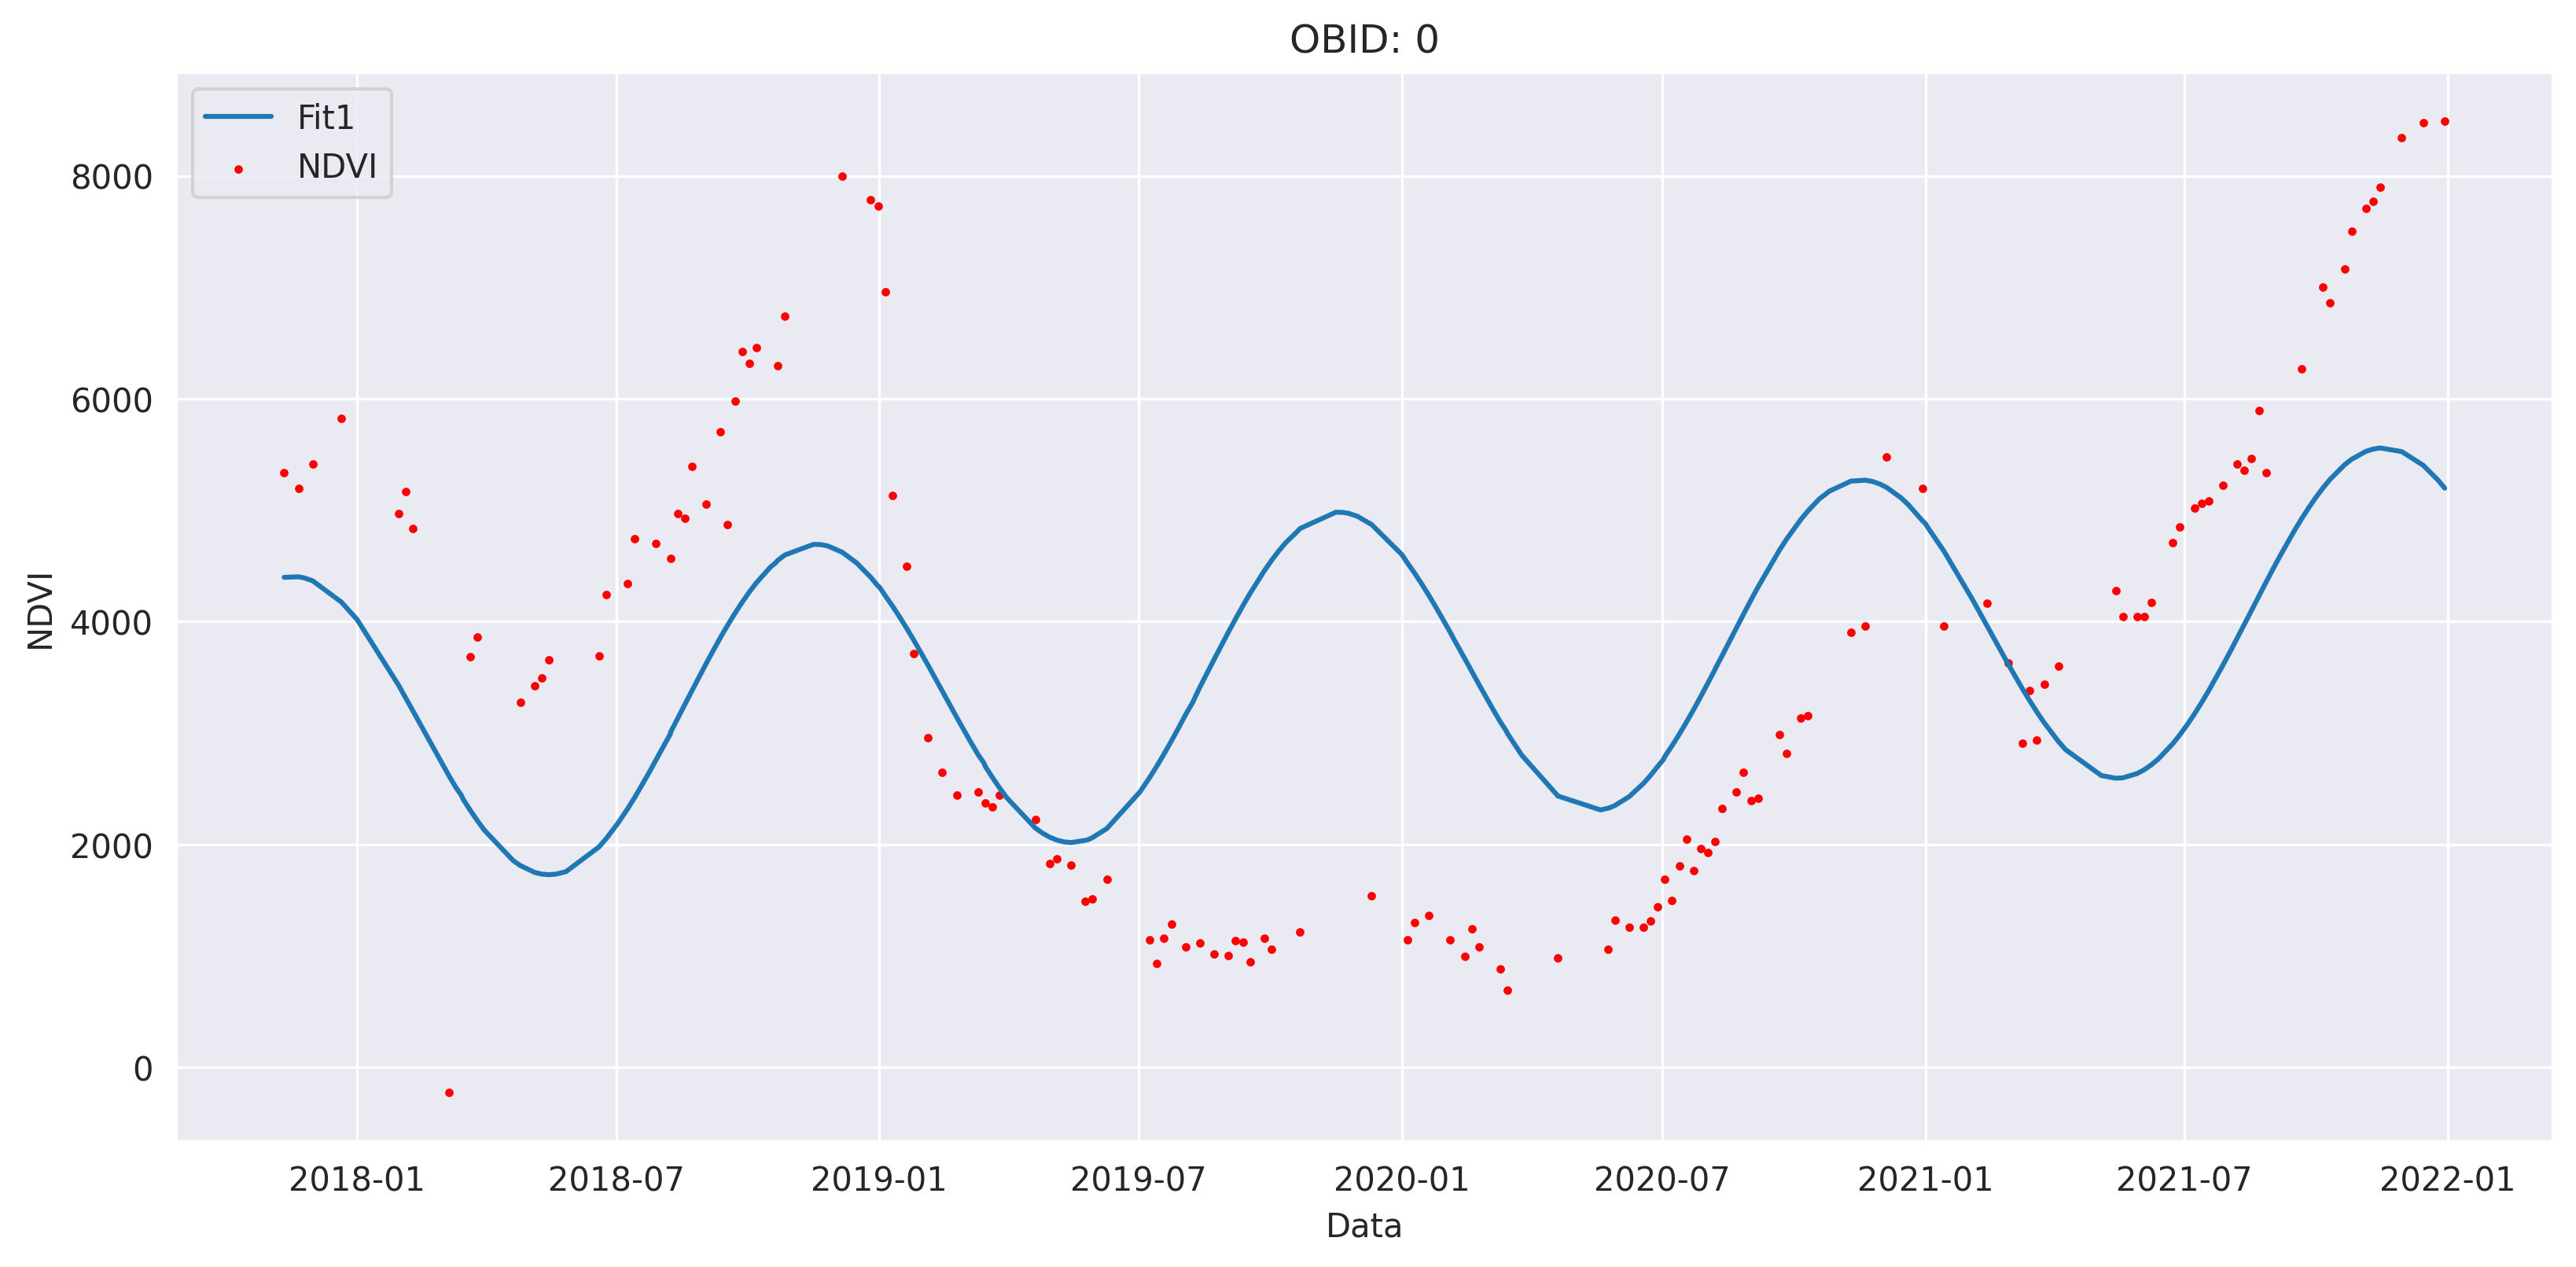

In [ ]:
#gera o grafico (somente exportar para o drive) para todos os pontos de validacao
funcoes.chartAllpoints(S2filtered_clipped, ccdc_result, runParams, params_ImgCol['banda'], points_ee, points_gdf, params_ImgCol['date_end'], OUTPUT_FOLDER)

#**4 - Executar CCDC e Extrair Informação para os Pontos de Análise e Buffer**

Nota: caso o ficheiro correspondente aos parametros de entrada já exista, será carregado a partir do disco. Caso contrário será calculado (tempo de execução em torno de 3h - para DGT 300 e buffer de 210m)

In [ ]:
#adiciona duas colunas (vazias) ao geodataframe (distancias necessarias para associar pontos aos pixels e aos buffers)
points_gdf = funcoes.dfColumnsToJoin(points_gdf)

In [ ]:
#analise baseada na funcao ee.Algorithms.TemporalSegmentation.Ccdc
#inputs:
#end_dates - datas para truncar a série
#points_gdf - geodataframe com os pontos
#caminho de saída onde será guardado o dataframe
#parametros da coleção de imagem
#parametros CCDC
#valor do buffer (inteiro ou False)
#OUTPUTS: 
#df_total - dataframe com as informações dos segmentos do CCDC (cada linha do dataframe é um segmento)
#fileName - nome do ficheiro guardado
df_total, fileName = funcoes.extractInfoMultipleEndDates(end_dates, points_gdf, os.path.join(PATH,Outputs, CCDC_Data_Frame, DGT_Val_300), params_ImgCol, params_ccdc, pointBuffer)

Dataframe file Pontos_total_S2SR-S2CLESS_NDVI_TMASKB3B12XX995YM1NOBS6LDA50ITER25000_BUF210_START20160101_END20211231.csv found in storage. Reading from drive


# **5 - Cruzamento (spatial join) da Informação do CCDC com os dados de referência DGT**

In [ ]:
#temporario
def fromNameReturnParams(name):
  indices = name[name.find('_',13)+1:name.find('TMASK')-1]
  chi = name[name.find('XX')+2:name.find('YM')]
  miny = name[name.find('YM')+2:name.find('NOBS')]
  lbda = name[name.find('LDA')+3:name.find('ITER')]

  return {'indices':indices, 'chi':chi, 'MY':miny, 'lambda':lbda}

names = ['Pontos_total_S2SR_NDVI_TMASKB3B12XX995YM1NOBS6LDA50ITER25000_BUF210_START20171101_END20211231.csv']

resultado = {'indices':[], 'chi':[], 'MY':[], 'lambda':[], 'VP':[], 'FP':[],'FN':[],'VN':[]}

for name in names:
  fileName = os.path.join(PATH,Outputs, CCDC_Data_Frame, DGT_Val_300, name)
  ccdcFiltro = funcoes.filterDate(fileName,dt_ini, dt_end, bandFilter )
  shpVal = os.path.join(PATH,FOLDER_DGT,DGT_MAIO,pol_val)
  ccdcVal, ccdcVal_T = funcoes.spatialJoin(shpVal, ccdcFiltro)
  ccdcVal_T = ccdcVal_T.loc[ccdcVal_T.bordadura == 0]
  DF_FINAL, DF_FINAL_T = funcoes.valPol(ccdcVal_T, 60)
  VPs = DF_FINAL.VP.sum()
  FPs = DF_FINAL.FP.sum()
  FNs = DF_FINAL.FN.sum()
  VNs = DF_FINAL.VN.sum()
  ccdcFiltro = None
  ccdcVal = None
  ccdcVal_T = None
  DF_FINAL = None
  DF_FINAL_T = None
  info = fromNameReturnParams(name)
  resultado['indices'].append(info['indices'])
  resultado['chi'].append(info['chi'])
  resultado['MY'].append(info['MY'])
  resultado['lambda'].append(info['lambda'])
  resultado['VP'].append(VPs)
  resultado['FP'].append(FPs) 
  resultado['FN'].append(FNs) 
  resultado['VN'].append(VNs)

df_res = pd.DataFrame(resultado)
df_res


In [ ]:
# Gerar o nome do ficheiro com os parâmentros da análise
save_name = "Pontos_total_{}.csv".format(funcoes.fromParamsReturnName(params_ImgCol, params_ccdc, 9999, 9999, pointBuffer)).replace('LON999900000E_LAT999900000N_','')
fileName = os.path.join(os.path.join(PATH,Outputs, CCDC_Data_Frame, DGT_Val_300), save_name)

In [ ]:
# Filtrar o ccdc para as datas e magnitudes desejadas (magnitude default é None)
# elimina tudo o que está fora do período que os analistas nao consideraram
# bandFilter - banda utilizada para filtrar o dataframe de acordo com a magnitude (bandFilter < threshold)
threshold = None #float ou inteiro
ccdcFiltro = funcoes.filterDate(fileName,dt_ini, dt_end, bandFilter, threshold ) # filtrar datas

# ccdcVal: data frame com as colunas reduzidas para facilitar a visualizacao (principais colunas)
# ccdcVal_T: data frame com todas as colunas
ccdcVal, ccdcVal_T = funcoes.spatialJoin(shpVal, ccdcFiltro) # Join espacial

# **6 - Criação das colunas VP, FP, FN, VN - Validação da deteção das alterações**

In [ ]:
# DF_FINAL data frame com as as métricas inseridas com colunas reduzidas
# DF_FINAL_T : dataFrame com todas as colunas para a matriz Binaria
DF_FINAL, DF_FINAL_T = funcoes.valPol(ccdcVal_T, theta) # validacao

#eliminar pontos da bordadura
#DF_FINAL_T = DF_FINAL_T.loc[DF_FINAL_T.bordadura == 0]

# **7 - Acrescentar à DataFrame os valores dos Rasters desejados (COSsim ou outros)**


To do: fazer uma forma de guardar o DF_COSSIM no drive. Usar como filename DGT_300_COSSIM_(fromParamsReturnName)

In [ ]:
"""
Classes de uso do solo da COSSIM por código
100: Artificializado; 200: Agricultura (somente COSSIM 18); 211: Culturas anuais de outono inverno;
212: Culturas anuais de primavera verao; 213: Outras areas agrucilas; 311: Sobreiro e Azinheira;
312: Eucalipto; 313: Outras folhosas; 321: Pinheiro bravo; 322: Pinheiro manso, 323: Outras reinosas;
410: Matos; 420: Vegetacao herbacea espontanea; 500: Supercies sem vegetacao; 610: Zonas humidas;
620: Agua
"""

#executa um extract do valor do raster para cada linha da tabela (lat lon)
pd.set_option('display.max_columns', None)
#COSSIM H
DF_COSSIM = funcoes.getRasterValue(DF_FINAL_T, cossim18_H, lbl_CS_18_H) # Valores COSsim H 2018
DF_COSSIM = funcoes.getRasterValue(DF_COSSIM, cossim20_H, lbl_CS_20_H) # Valores COSsim H 2020
DF_COSSIM = funcoes.getRasterValue(DF_COSSIM, cossim21_H, lbl_CS_21_H) # Valores COSsim H 2021

# COSSIM A
DF_COSSIM = funcoes.getRasterValue(DF_COSSIM, cossim21_A, lbl_CS_18_A) # Valores COSsim A 2018
DF_COSSIM = funcoes.getRasterValue(DF_COSSIM, cossim21_A, lbl_CS_20_A) # Valores COSsim A 2020
DF_COSSIM = funcoes.getRasterValue(DF_COSSIM, cossim21_A, lbl_CS_21_A) # Valores COSsim A 2021

# **8 - Preparar o DataFrame para a conversão para matriz numérica**

In [ ]:
"""
Carcteres para nomear as colunas do Data Frame Numerico gerado, de acordo com as classes da DGT e COSsim.
  Classes de uso do solo indentificados pela DGT
  PBR: Pinheiro bravo; MAT: Matos; VHE: Vegetacao herbace espontanea; EUC: Eucalipto;
  OFP: Outras folhosas persistente; AGR: Agricultura; SVE: Superficie sem vegetacao escura;
  SVC: Superficie sem vegetacao clara; 
  OFC: Outras folhosas caduca; SEA: Sobreiro e Azinheira; PMA: Pinheiro Manso

  tipo de alteracao identificada pela DGT
  TIP_AGR:  Agricultura, TIP_AGU: Agua, TIP_FOG:Fogo, TIP_COR: Corte

  Codificacao da COSSim
  100: 'ART', 200: 'AGR' (somente COSSim 18), 211: 'AGR', 212: 'AGR', 213: 'AGR', 311: 'SEA', 312: 'EUC', 313: 'OFS',
  321: 'PBR', 322: 'PMA', 323: 'ORS', 410: 'MAT', 420: 'VHE', 500: 'SVG',610: 'ZHU', 620: 'AGU'
"""

mBin = funcoes.dfBinario(DF_COSSIM)
mBin2 = funcoes.dfBinario_v2(DF_COSSIM)
#pd.set_option('display.max_columns', None)

#**9 - Gerar TIF (exporta informacoes para um tile completo)**

In [ ]:
#definir a informacao deseja no parametro export
#funcoes.exportTif(params_ImgCol, points_ee, params_ccdc, os.path.join(PATH, Outputs), 'epsg:32629', export='latestBreak')
funcoes.exportTif(params_ImgCol, points_ee, params_ccdc, os.path.join(PATH, Outputs, CCDC_Images), 'epsg:32629', export='specificYearBreak', year=2021)
#opcoes export: 'countBreaks', 'largestMagBreak', 'latestBreak', 'specificYearBreak'
#(params_ImgCol, points_ee, params_ccdc, output_path, export_crs, export='countBreaks', year=False)

Generating raster with date in milliseconds of breaks detected within the agricultural year of 2021 (band 1) and the associated magnitude of change (band 2)


Running export task... Time elapsed: 57.25 min
Export finished


In [ ]:
funcoes.fromParamsReturnNameTiff(params_ImgCol, params_ccdc, points_ee.geometry().bounds(), 'largestMagBreak')

In [ ]:
len('TMASKB3B12X99YM133NOBS6LDA100ITER25000')

38

#**10 - Gerar compósitos mensais**

Há dois filtros de nuvens que podem ser escolhidos (SCL e s2cloudless).
É feito um processo de gap filling com os segmentos do CCDC para criar valores nos meses em que não há observações.

In [ ]:
gap_filled = fillImgColGapsWithCCDC(params_ImgCol, bands_composite, params_ccdc, points_ee, buf=pointBuffer)

In [ ]:
#definir o composite period - periodo para qual serao gerados os compositos mensais
composite = funcoes.createComposite(gap_filled, composite_period)

In [ ]:
import time
for i in range(0,300):
  task = ee.batch.Export.image.toDrive(composite, 
                                    description='Composite_{}'.format(i),
                                    folder='Compositos',
                                    region = points_ee.filter(ee.Filter.eq('OBID',i)).first().geometry().buffer(pointBuffer),
                                    scale= 10,
                                    crs= 'EPSG:32629', 
                                    maxPixels = 1e10)
  task.start()
  time.sleep(1)


In [ ]:
#a seguir, executar os seguintes passos (feitos em máquina local)
#0 - juntar os compositos de cada buffer num unico ficheiro tif
  #feito em maquina local com gdalbuildvrt, seguido de gdaltranslate
#1 - abrir dataframe exportado CCDC (ou algum dataframe que contenha informação da geometria dos pontos)
df_ccdc = pd.read_csv("Pontos_total_S2SR_NDVI_TMASKB3B12XX995YM1NOBS6LDA300ITER25000_BUF210_START20160101_END20211231.csv", sep=';')
#2 - eliminar colunas desnecessarias
df_ccdc_cleaned = df_ccdc[['coord_ccdc','Point_Val']]
del df_ccdc
#3 - limpar duplicatas
unique = df_ccdc_cleaned.drop_duplicates()
#4 - transformar para gdf
unique['y'] = unique.coord_ccdc.apply(lambda x: x[1:x.find(',')])
unique['x'] = unique.coord_ccdc.apply(lambda x: x[x.find(',')+1:-1])
gdf_ccdc = gpd.GeoDataFrame(unique, geometry=gpd.points_from_xy(unique.x.astype(np.float32), unique.y.astype(np.float32)), crs=4326)
#5 - converter para o mesmo CRS do composito
gdf_ccdc = gdf_ccdc.to_crs('epsg:32629') #OBS - ESSA OPERAÇÃO PODE FALHAR A DEPENDER DA VERSÃO DO GEOPANDAS. FUNCIONA NO COLAB, FALHOU NA MÁQUINA LOCAL
#6 - obter coordenadas
coords = [(x,y) for x, y in zip(gdf_ccdc.geometry.x, gdf_ccdc.geometry.y)]
#7 - abrir raster do composito e fazer o sample
src = rasterio.open("Composito.tif")
sampled_values = [x for x in src.sample(coords)]
#8 - criar dataframe a partir do resultado e renomear colunas conforme as bandas
df_sampled_values = pd.DataFrame(sampled_values)
df_sampled_values.columns = composite.bandNames().getInfo() #band names
#9 - fazer join com o dataframe inicial, respeitando a ordem
joined = gdf_ccdc.reset_index(drop=True).join(df_sampled_values)
#10 - eliminar colunas a mais
joined.drop(columns=['x','y'],inplace=True)
#11 - exportar resultado como csv
joined.to_csv('Composito_DataFrame.csv')

In [ ]:
##problem with this point
#-8.29818045962111 39.76121680751865